In [1]:
import numpy as np
def k(x,xprime,sigs=2.0):
    return sigs*x*xprime

def K(s,t,sprime,tprime,sigs=2.0):
    return sigs*((tprime**2 - sprime**2)*(t**2 - s**2))/4
    #return indefK(tprime,t,l)-indefK(sprime,t,l)-indefK(tprime,s,l)+indefK(sprime,s,l)
    
def Kcross(s,t,sprime,sigs=2.0):
    return sigs*(sprime)*(t**2/2 - s**2/2)

step = 0.002
v = u= 0
s,t = 1,5
xlatent = 1
sprime,tprime = 4,5
for x in np.arange(s,t,step):
    u+=k(x,xlatent)
    for xprime in np.arange(sprime,tprime,step):
        v+=k(x,xprime)
print(v*step**2)
print(K(s,t,sprime,tprime))
print(u*step)
print(Kcross(s,t,xlatent))

107.94000800000289
108.0
23.99200000000001
24.0


In [2]:
import numpy as np
def k(x,xprime,l=2.0):
    r = np.abs(x-xprime)
    return (1+np.sqrt(3)*r/l)*np.exp(-np.sqrt(3)*r/l)

def indefK(x,xprime,l=2.0):
    return -(l**2 + l*(x-xprime)/np.sqrt(3))*np.exp(-np.sqrt(3)*(x-xprime)/l)

def Kdj(s,t,sprime,tprime,l=2.0):
    if sprime>s:
        sprime,s = s,sprime
        tprime,t = t,tprime
    return indefK(t,tprime,l)-indefK(s,tprime,l)-indefK(t,sprime,l)+indefK(s,sprime,l)
    #return indefK(tprime,t,l)-indefK(sprime,t,l)-indefK(tprime,s,l)+indefK(sprime,s,l)

def Kol(s,t,l=2.0):
    return indefK(t,tprime,l)-indefK(s,tprime,l)-indefK(t,sprime,l)+indefK(s,sprime,l)


def indefKcross(x,xprime,l=2.0):
    return -(2*l/np.sqrt(3) + (x-xprime))*np.exp(-np.sqrt(3)*(x-xprime)/l)

def Kcross(s,t,sprime,l=2.0):
    return indefKcross(t,sprime,l)-indefKcross(s,sprime,l)

step = 0.01
v = u= 0
s,t = 1,5
xlatent = 0
sprime,tprime = 1,5
for x in np.arange(s,t,step):
    u+=k(x,xlatent)
    for xprime in np.arange(sprime,tprime,step):
        v+=k(x,xprime)
print(v*step**2)
print(Kdj(s,t,sprime,tprime))
print(u*step)
print(Kcross(s,t,xlatent))

11.01477915657724
-27.49955561681196
1.2993414825105165
1.295765705726737


In [3]:
2*(indefK(t,s)-indefK(s,s))

7.460443795514186

In [30]:
import GPy
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from mix_integral_linear import Mix_Integral_Linear
from scipy.stats import norm

In [37]:
#X = 2.0*np.array([[1,0],[2,1],[3,2],[4,3],[10,9],[11,10],[12,11],[13,12]])
X = 2.0*np.array([[1,0],[2,1],[3,2],[4,3],[10,9],[11,10],[12,11],[13,12]])
X = np.c_[X,np.zeros([len(X),1])]
#X[:,1]+=1

#X = np.linspace(0,20,8)[:,None]
#X = np.c_[X,np.zeros([len(X),1])]
#X = np.c_[X,np.ones([len(X),1])]

Y = 10.0*np.array([[7,6,4,1,1,4,6,7]]).T
Y+=np.random.randn(len(Y),1)*0.1

X = 1.0*np.array([[8,0,0],[3.5,2.5,0],[6,4,0],[8,7,0]])
Y = 1.0*np.array([[32,3,10,7.5]]).T
Y+=np.random.randn(len(Y),1)*1.0
Y = np.array([[33.4656796 ],
       [ 3.49364358],
       [ 9.56898672],
       [ 8.272576  ]])
kernel = Mix_Integral_Linear(3,variances=500.0)
m = GPy.models.GPRegression(X,Y,kernel)
testX = np.linspace(-5,30,500)[:,None]
testX = np.c_[testX,np.zeros([len(testX),1]),np.ones([len(testX),1])]
mu,var = m.predict_noiseless(testX)

In [38]:
step = 0.01
v = u= 0
s,t = 2,7
xlatent = 0
l = 2.0
sprime,tprime = 0,6
for x in np.arange(s,t,step):
    u+=kernel.k_ff(x,xlatent)
    for xprime in np.arange(sprime,tprime,step):
        v+=kernel.k_ff(x,xprime)
print(v*step**2)
print(kernel.k_xx(t,tprime,s,sprime))
print(u*step)
#print(kernel.k_xf(s,t,xlatent,l))

print(kernel.k_xf(t,xlatent,s))

403.8757499999971
405.0
0.0
0.0


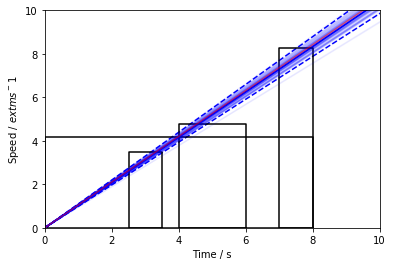

In [39]:
plt.plot(testX[:,0],mu,'b-')
plt.plot(testX[:,0],mu+np.sqrt(var)*1.96,'b--')
plt.plot(testX[:,0],mu-np.sqrt(var)*1.96,'b--')
for x,y in zip(X,Y):
    if x[-1]==0:
        
        plt.plot([x[0],x[1],x[1],x[0],x[0]],[0,0,y/np.abs(x[1]-x[0]),y/np.abs(x[1]-x[0]),0],'k-')
    else:
        plt.plot([x[0],x[0]],[-1,-2],'r-')
mu,K = m.predict_noiseless(testX,full_cov=True)        
sample = np.random.multivariate_normal(mu[:,0],K,size=100)        
plt.plot(testX[:,0],sample.T,'b-',alpha=0.05);
plt.plot(testX[:,0],sample[0:1,:].T,'r-',alpha=0.5);
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('Time / s')
plt.ylabel('Speed / $\text{ms}^-1$')
plt.savefig('linear_kernel_demo.pdf')

In [41]:
m.predict_noiseless(np.array([[5,np.nan,1]]))

(array([[5.20964802]]), array([[0.02102162]]))